In [1]:
import paleo_bulk
import time

# 5 - Bulk Analysis of cell tracks 

In this notebook we will use a combination of detected spots from Mastodon and Masks from labkit in order to choose regions of interest. 

Moreover, we will also be able to edit files from Mastodon in order to be able to observe cell tracks we choose in the user interface of BigDataViewer with Mastodon. 

## Folder and data paths
In the next cell, you need to specify:
- ``path_xml``: Path and file name of the .xml file obtained from converting the data to HDF5/XML is stored.
- ``path_labels``: Path and file name of the .xml.labeling file obtained from the Labkit Fiji Plugin. Before loading it, remove the .labeling extension so that it only has the .xml extension. 

<div class="alert alert-block alert-warning">
    <b>WARNING:</b> Be careful not to overwrite your .xml created from the HDF5/XML.
</div>

- ``path_mamut``: Path and dile name of the mamut.xml file obtained from Mastodon. This file can be edited in order to interact with Mastodon. 

In [8]:
# Path to .xml file generated when creating the .hdf5
path_xml = '../Data/Bulk_Data/dataset.xml'

# Path to mamut.xml file
path_mamut = '../Data/Bulk_Data/dataset_mamut.xml'

# Path to the Labeling
path_labels = '../Data/Bulk_Data/dataset_labels.xml'

path_save = '../Data/Bulk_Data'

In [3]:
# Path to .xml file generated when creating the .hdf5
path_xml = '../Data/Ece/p2_fr61.xml'

# Path to mamut.xml file
path_mamut = '../Data/Ece/211216_p2_fr61_mamut.xml'

# Path to the Labeling
path_labels = '../Data/Ece/211216_p2_fr61_labels.xml'

In [9]:
features = paleo_bulk.XMLParser(path_xml, path_mamut, 1)

The image has the following dimensions (XYZC): 1222, 1732, 150, 2
There are 20 frames in total.
Pixel Size: x = 0.347 micron, y = 0.347 micron z = 1.5 micron
There are 150 Z-slices in total


There are 257115 number of cells in total in Looping.
There are 19086 number of cell tracks in total in Looping.


## LabKit Data

Here we read the labels you created using Labkit. Later in the code, we will remove all the tracks which are not contained in your label(s) and we will resave the -mamut.xml file containing the tracks for each label individually. 

Here we create an object called ``labkit`` which contains:
- ``masks`` : The binary masks created from the Labkit Fiji Plugin
- ``spots_to_keep`` : The ID of the spots to keep (which are contained inside the mask defined before)



In [11]:
t = time.time()
labkit = paleo_bulk.LabkitData(path_labels, path_xml, path_mamut, 0)
print('Elapsed time in seconds: ', time.time() - t)

Elapsed time in seconds:  239.6198709011078


### Plot the results

Choose a frame you would like to visualize by changing the value in `frame`. 

*If you choose an invalind frame value, you will get an error. Frames are the number of timepoints your mamut file contains.*

You can also change the colormap defined below as ``cmap``. You can choose any of the [Matplotlib options](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

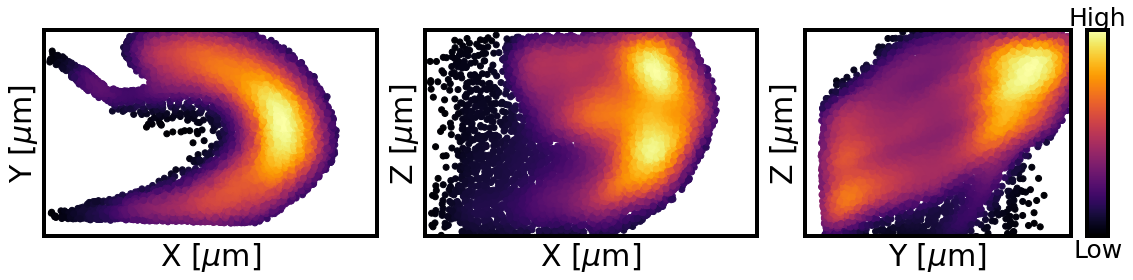

In [12]:
paleo_bulk.Plots(path_mamut, path_xml, labkit, 'gkd');

## Spots tp keep according to labeling

Here we chose the spots we want to keep according to the labling we previously showed from labkit. 

### Sanity check: Are your labels and mastodon tracks ok?

Here we overlap the mastodon spots and the labels to check whether they overlap. If they do not, please check the frame you chose to plot the label and that the xml pixels sizes are correct. 

The spots shown below are the ones you decided to keep for the specific frame you chose. 

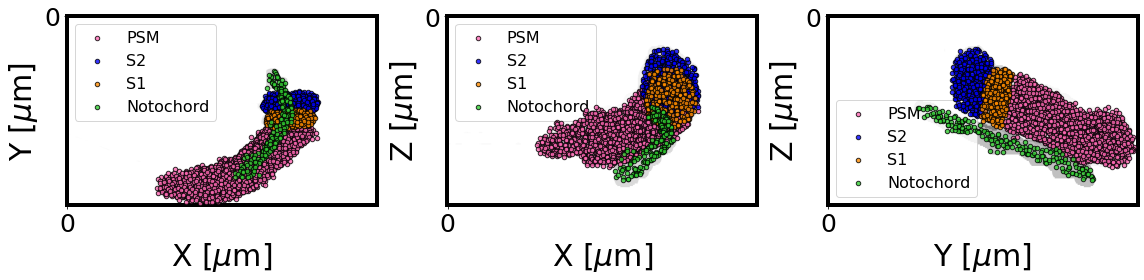

In [13]:
paleo_bulk.Plots(path_mamut, path_xml, labkit, 'masks_spots');

### 3D Visualization

In grey are plotted all the initial set of cells while colored are the cells which have ben selected using labkit. 

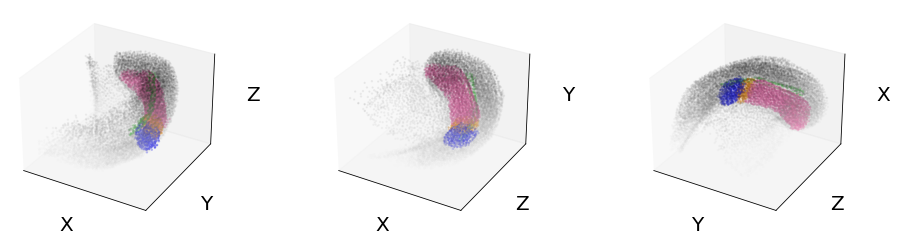

In [14]:
paleo_bulk.Plots(path_mamut, path_xml, labkit, '3d');

## Remove Spots which are not in the PSM

In [11]:
paleo_bulk.SpotsRemoval(path_save, path_mamut, path_labels, path_xml);

Label: background
Elapsed time in seconds:  0.14459633827209473
Number of spots: 6932
Label: foreground
Elapsed time in seconds:  0.14538121223449707
Number of spots: 6932


## Code it yourself!

## Ordering the tracks ID

If you want to perform your own analysis with the coordinates of the cell tracks, here we define an object called ``spots``:

``spots = paleo_bulk.MamutTracks(path_xml, path_mamut)``

This object includes:
- ``n_spots_in_frame`` : The number of spots in each frame
- ``spots_ID_per_frame`` : The ID for each spot in each frame
- ``spots_trackID_per_frame`` : The track ID for each cell in each frame
- ``spots_xpos_per_frame`` : X-coordinates of each spot in each frame
- ``spots_ypos_per_frame`` : Y-coordinates of each spot in each frame
- ``spots_zpos_per_frame`` : Z-coordinates of each spot in each frame

All of these lists have a similar structure, for example ``spots_track_ID`` looks as following:

[ track number 1: { spot ID 1, spot ID 2, ... } ] ; [ track number 2: { spot ID 1, spot ID 2, ... } ] ; ...

Each track represents the entire track of a single cell and each spot corresponds to the cell in a given frame. 

In [ ]:
spots = paleo_bulk.MamutTracks(path_xml, path_mamut)